In [84]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

# Visualizations

In [86]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [87]:
EXPERIMENT_NAME = 'stress_testing_nulls'
DB_COLLECTION_NAME = f'{EXPERIMENT_NAME}_results'
DATASET_NAME = 'Folktables_GA_2018'
EXPERIMENT_SESSION_UUID = 'c53d250b-5ba9-4d91-a444-ed7eb7919de5'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'AGEP', 'SEX&RAC1P&AGEP']
PREPROCESSING_TECHNIQUES = ['cat: mode, num: median', 'cat: mode_trimmed_0.3, num: median']

In [88]:
# MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
#                'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier']
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression']

In [89]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [90]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [91]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(672, 27)

In [92]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 14:09:26.705,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.770941,0.819535,0.771368,0.782867,0.737063,0.905405,0.746923,0.813958,0.7791
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 11:28:31.703,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.767077,0.815636,0.761876,0.782268,0.731707,0.932075,0.738142,0.814210,0.7754
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,1,OK,2023-04-22 14:09:26.716,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.768537,0.815962,0.768010,0.780637,0.735664,0.899614,0.745962,0.809583,0.7765
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,1,OK,2023-04-23 11:28:31.727,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.766353,0.815636,0.761283,0.781665,0.731707,0.932075,0.737750,0.813393,0.7748
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,2,OK,2023-04-22 14:09:26.728,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.767456,0.813580,0.766484,0.779447,0.734965,0.893822,0.746154,0.806667,0.7752
5,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,2,OK,2023-04-23 11:28:31.743,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.765629,0.815636,0.760689,0.781062,0.731707,0.932075,0.737358,0.812577,0.7742
6,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,3,OK,2023-04-22 14:09:26.745,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.762889,0.805241,0.761600,0.774093,0.734266,0.886100,0.743269,0.798958,0.7700
7,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,3,OK,2023-04-23 11:28:31.756,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.764663,0.816803,0.759501,0.780760,0.731707,0.935849,0.736966,0.811760,0.7736
8,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,4,OK,2023-04-22 14:09:26.758,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.757481,0.794521,0.757021,0.766954,0.730769,0.874517,0.738654,0.790833,0.7637
9,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,4,OK,2023-04-23 11:28:31.767,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.763939,0.815636,0.758314,0.780157,0.730352,0.932075,0.736574,0.810535,0.7728


In [93]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [94]:
exp_subgroup_metrics_dct['DecisionTreeClassifier']['cat: mode_trimmed_0.3, num: median']['Exp_iter_1'][0.0].head(100)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 11:28:31.703,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.767077,0.815636,0.761876,0.782268,0.731707,0.932075,0.738142,0.814210,0.775400
29,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 11:29:59.862,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.779628,0.808635,0.769596,0.792220,0.743902,0.920755,0.755782,0.814618,0.784600
85,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 11:28:31.703,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.202714,0.000000,0.182374,0.184462,0.000000,0.000000,0.179478,0.188218,0.183759
113,Entropy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 11:29:59.862,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.195912,0.000000,0.174220,0.184598,0.000000,0.000000,0.155674,0.207590,0.181103
169,F1,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 11:28:31.703,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.789531,0.888260,0.802560,0.818044,0.762590,0.961538,0.777778,0.847979,0.812802
197,F1,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 11:29:59.862,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.796523,0.884181,0.806387,0.823288,0.770352,0.955032,0.788167,0.846725,0.817550
253,FNR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 11:28:31.703,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.147433,0.048485,0.109290,0.131156,0.140541,0.034335,0.123031,0.124828,0.123967
281,FNR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 11:29:59.862,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.158267,0.051515,0.116940,0.140792,0.143243,0.042918,0.130533,0.135172,0.132950
337,FPR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 11:28:31.703,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.322772,0.639594,0.391417,0.329420,0.396739,0.312500,0.413793,0.274274,0.350925
365,FPR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 11:29:59.862,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.285644,0.659898,0.365410,0.294199,0.369565,0.343750,0.368637,0.258258,0.318899


In [95]:
exp_subgroup_metrics_dct['DecisionTreeClassifier']['cat: mode, num: median']['Exp_iter_1'][0.0].head(100)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 14:09:26.705,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.770941,0.819535,0.771368,0.782867,0.737063,0.905405,0.746923,0.813958,0.779100
28,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 14:12:05.983,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.735128,0.799285,0.739316,0.749108,0.730769,0.880309,0.744615,0.747292,0.745900
84,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 14:09:26.705,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.136117,0.000000,0.000000,0.119009,0.000000,0.000000,0.087815,0.000000,0.123117
112,Entropy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 14:12:05.983,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.000000,0.000000,0.164167,0.000000,0.000000,0.000000,0.000000,0.178092,0.000000
168,F1,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 14:09:26.705,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.791785,0.890889,0.809463,0.817500,0.763819,0.945495,0.782982,0.847793,0.814852
196,F1,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 14:12:05.983,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.764127,0.877588,0.779100,0.795043,0.744526,0.930804,0.773456,0.805453,0.789948
252,FNR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 14:09:26.705,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.161693,0.046261,0.121480,0.141507,0.155556,0.038462,0.133577,0.136458,0.135053
280,FNR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 14:12:05.983,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.174185,0.068620,0.168415,0.140982,0.220833,0.056561,0.172628,0.128125,0.149822
336,FPR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-22 14:09:26.705,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.301901,0.636126,0.361092,0.315952,0.371831,0.421053,0.386179,0.260417,0.331050
364,FPR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-22 14:12:05.983,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.362931,0.649215,0.374744,0.394511,0.318310,0.486842,0.347561,0.439583,0.387900


In [96]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

In [97]:
exp_avg_group_metrics_dct['DecisionTreeClassifier']['cat: mode_trimmed_0.3, num: median']['Exp_iter_1'][0.5].head(100)

,Metric,SEX,RAC1P,AGEP,SEX&RAC1P&AGEP,Model_Name
0,Equalized_Odds_TPR,0.001645,0.024543,-0.105276,-0.109941,DecisionTreeClassifier
1,Equalized_Odds_FPR,0.123790,0.070630,-0.336938,0.055707,DecisionTreeClassifier
2,Disparate_Impact,1.166351,1.094044,1.000065,1.235596,DecisionTreeClassifier
3,Statistical_Parity_Difference,0.177078,0.104843,0.000075,0.240146,DecisionTreeClassifier
4,Accuracy_Parity,-0.068726,-0.022653,-0.046045,-0.202255,DecisionTreeClassifier
5,Label_Stability_Ratio,1.063644,0.999497,0.897431,0.930764,DecisionTreeClassifier
6,IQR_Parity,-0.055913,0.009409,0.008361,-0.026691,DecisionTreeClassifier
7,Std_Parity,-0.026445,0.000269,0.015080,-0.004886,DecisionTreeClassifier
8,Std_Ratio,0.782722,1.002484,1.157532,0.951136,DecisionTreeClassifier
9,Jitter_Parity,-0.026574,-0.002676,0.073453,0.059421,DecisionTreeClassifier


## Metrics Visualization and Reporting

In [98]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

In [99]:
visualizer.melted_exp_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_2'][0.5]

,Metric,Model_Name,Num_Estimators,Test_Set_Index,Dataset_Split_Seed,Model_Init_Seed,Subgroup,Metric_Value
0,Accuracy,DecisionTreeClassifier,10.0,6.0,200.0,200.0,AGEP_dis,0.730299
1,Entropy,DecisionTreeClassifier,10.0,6.0,200.0,200.0,AGEP_dis,0.053732
2,F1,DecisionTreeClassifier,10.0,6.0,200.0,200.0,AGEP_dis,0.760109
3,FNR,DecisionTreeClassifier,10.0,6.0,200.0,200.0,AGEP_dis,0.183482
4,FPR,DecisionTreeClassifier,10.0,6.0,200.0,200.0,AGEP_dis,0.364413
...,...,...,...,...,...,...,...,...
139,Positive-Rate,DecisionTreeClassifier,10.0,6.0,200.0,200.0,overall,1.155769
140,Selection-Rate,DecisionTreeClassifier,10.0,6.0,200.0,200.0,overall,0.645150
141,Std,DecisionTreeClassifier,10.0,6.0,200.0,200.0,overall,0.064045
142,TNR,DecisionTreeClassifier,10.0,6.0,200.0,200.0,overall,0.600837


In [100]:
visualizer.melted_exp_avg_runs_group_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_2'][0.3].head(1000)

,Metric,Model_Name,Group,Metric_Value
0,Equalized_Odds_TPR,DecisionTreeClassifier,SEX,0.044715
1,Equalized_Odds_FPR,DecisionTreeClassifier,SEX,0.091568
2,Disparate_Impact,DecisionTreeClassifier,SEX,1.222337
3,Statistical_Parity_Difference,DecisionTreeClassifier,SEX,0.232837
4,Accuracy_Parity,DecisionTreeClassifier,SEX,-0.036759
5,Label_Stability_Ratio,DecisionTreeClassifier,SEX,1.014984
6,IQR_Parity,DecisionTreeClassifier,SEX,-0.009118
7,Std_Parity,DecisionTreeClassifier,SEX,-0.010135
8,Std_Ratio,DecisionTreeClassifier,SEX,0.852405
9,Jitter_Parity,DecisionTreeClassifier,SEX,-0.010566


### Subgroup metrics per dataset, experiment iteration, and model

In [101]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[1],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [102]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset, experiment iteration, and model

In [103]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [104]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset, experiment iteration, and multiple models

In [105]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[1],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [106]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [107]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Label_Stability_Ratio',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

In [108]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Disparate_Impact',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

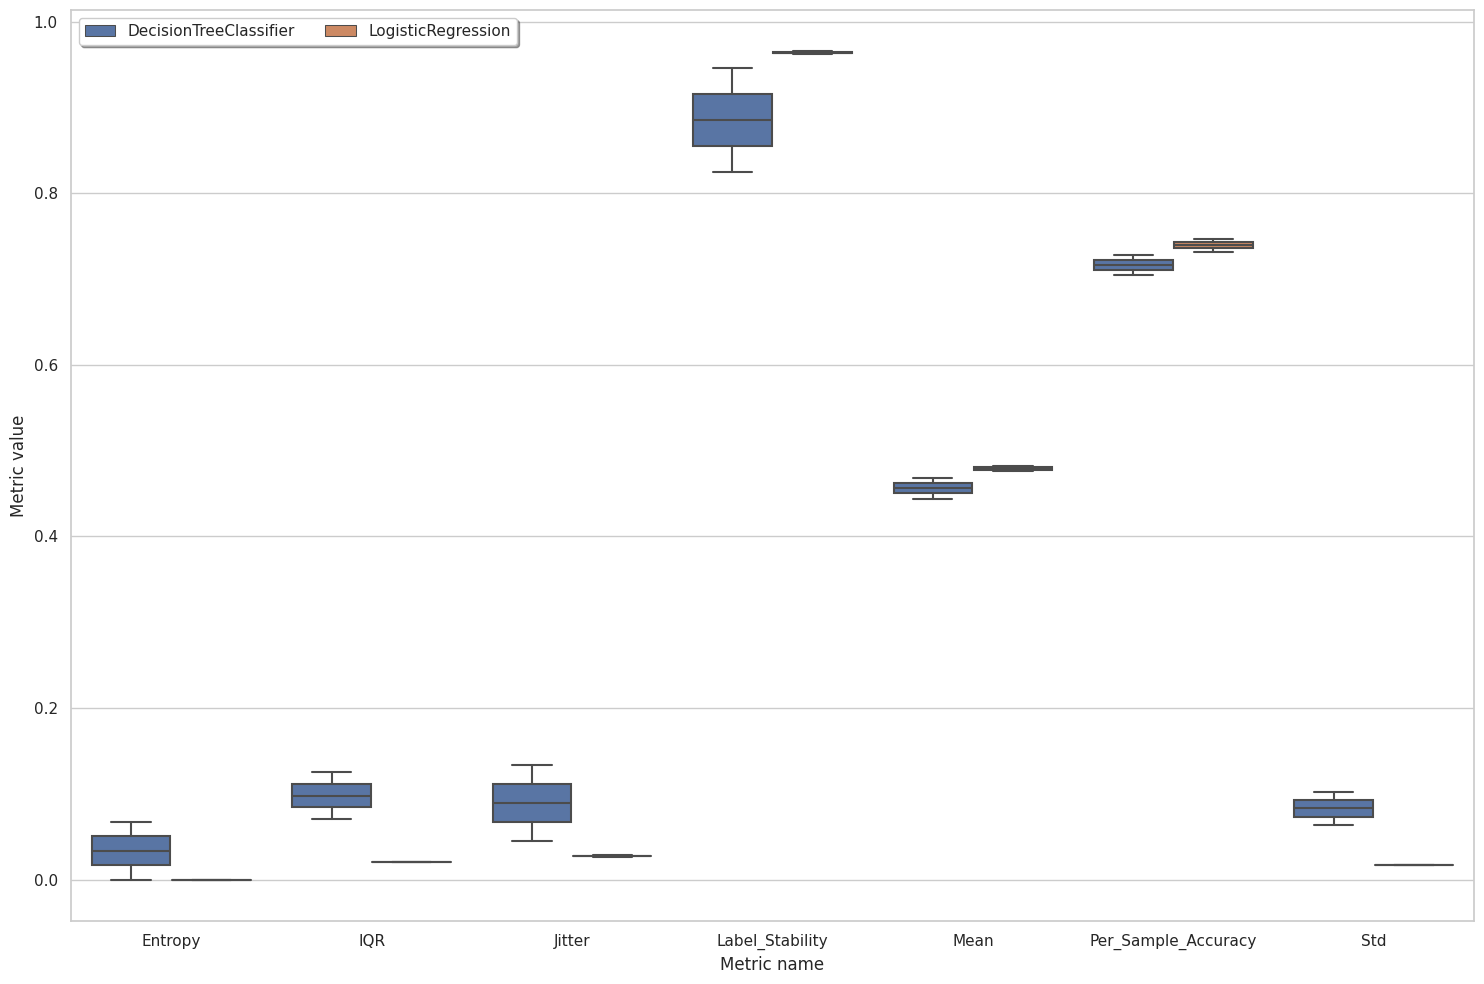

In [109]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='variance')

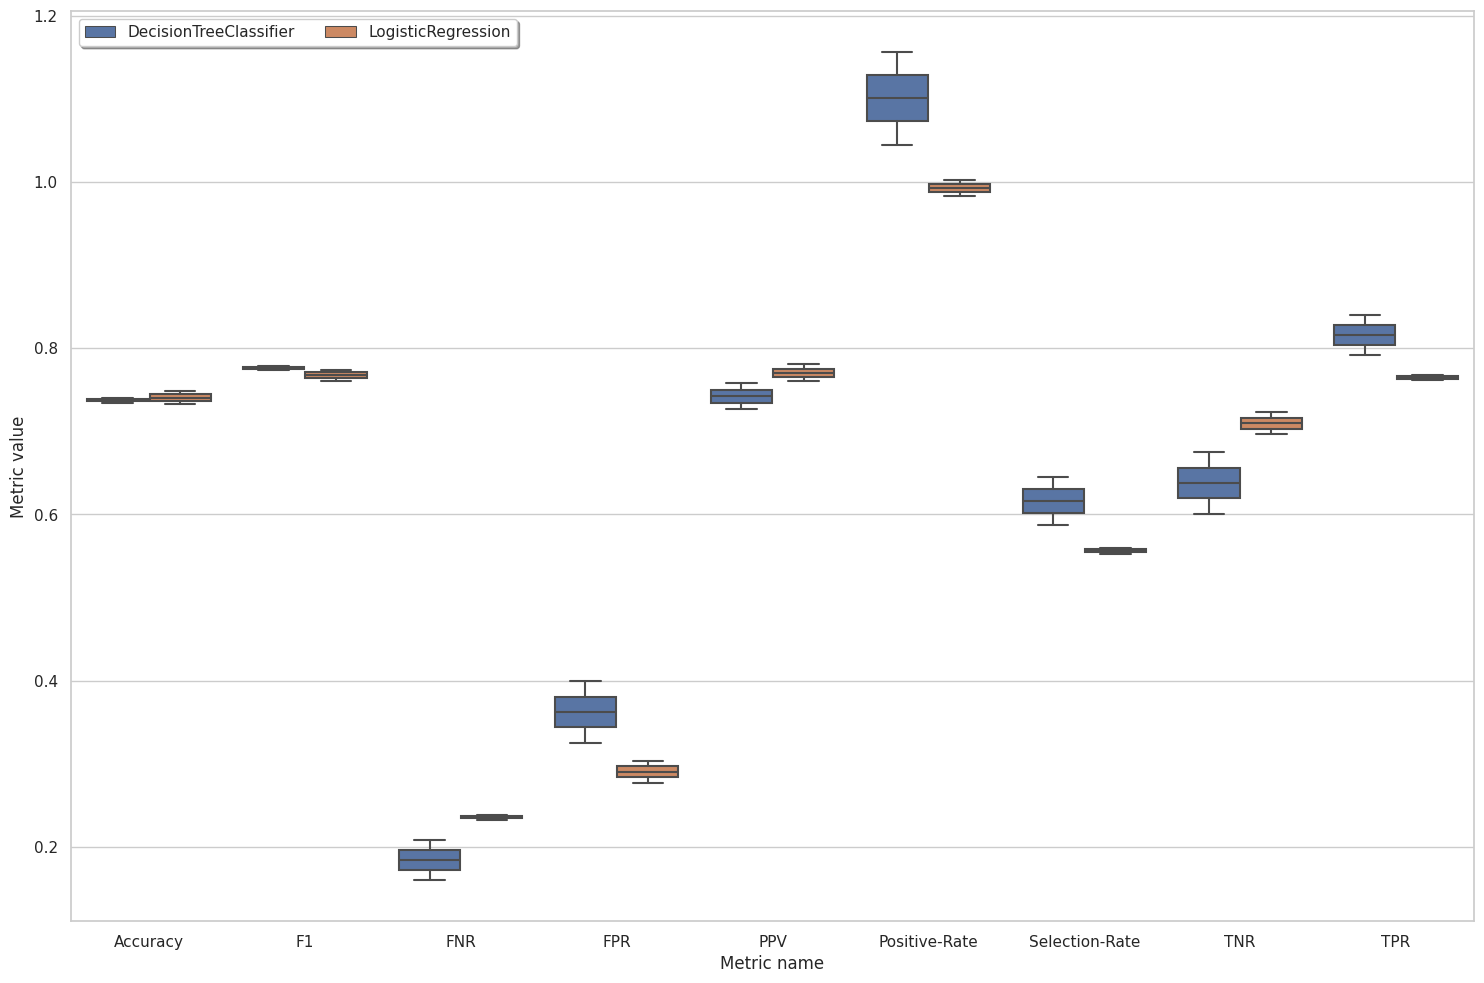

In [111]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='error')

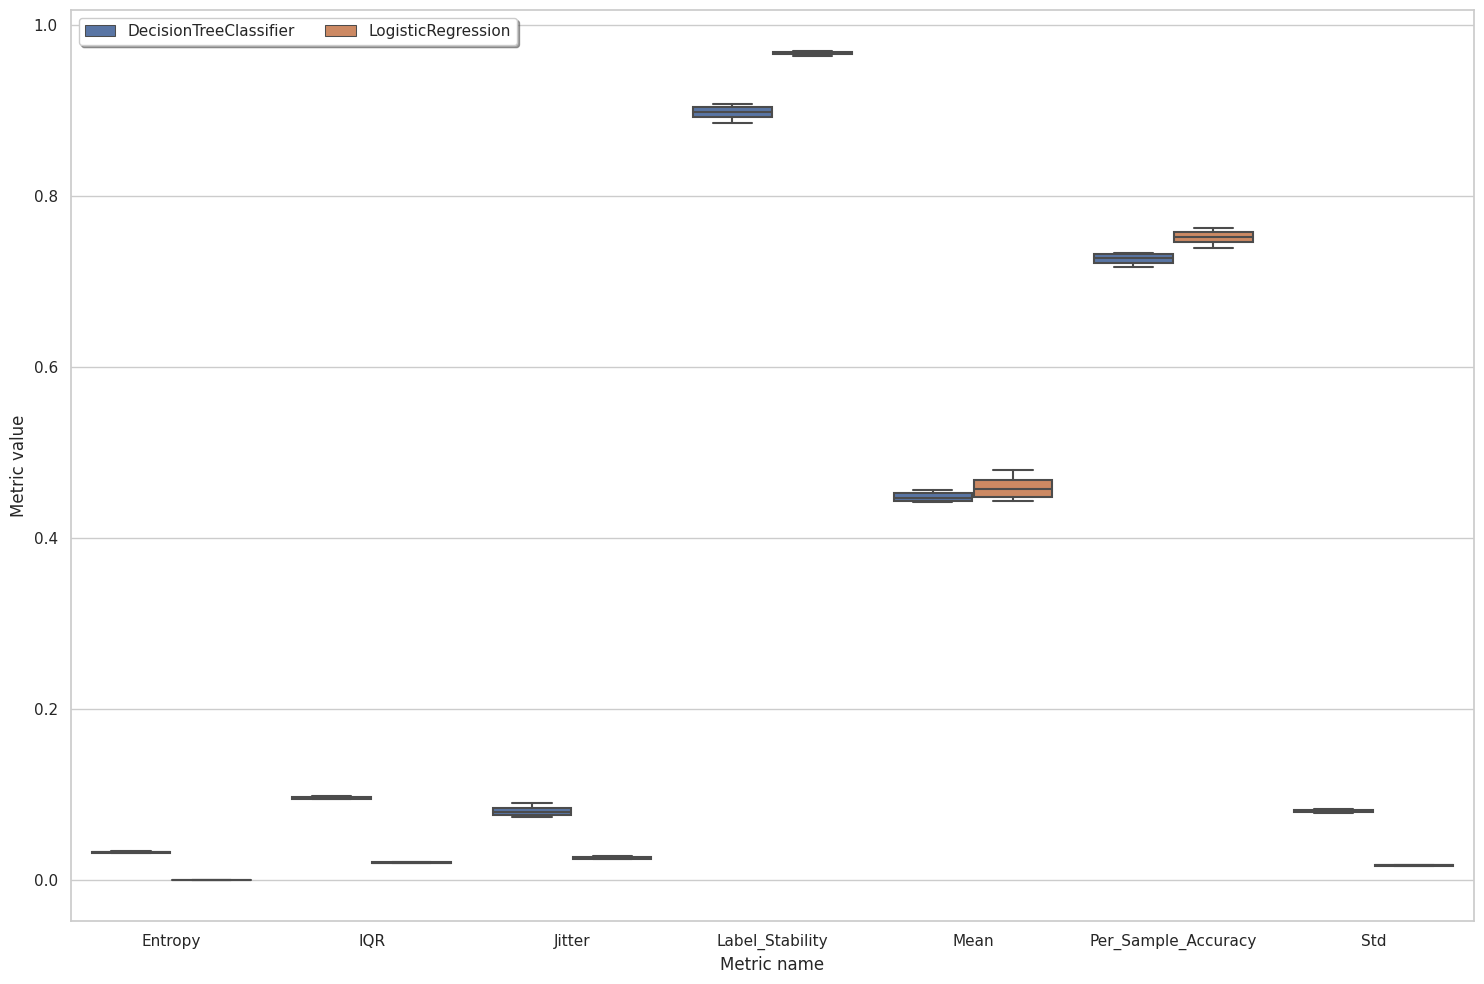

In [112]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

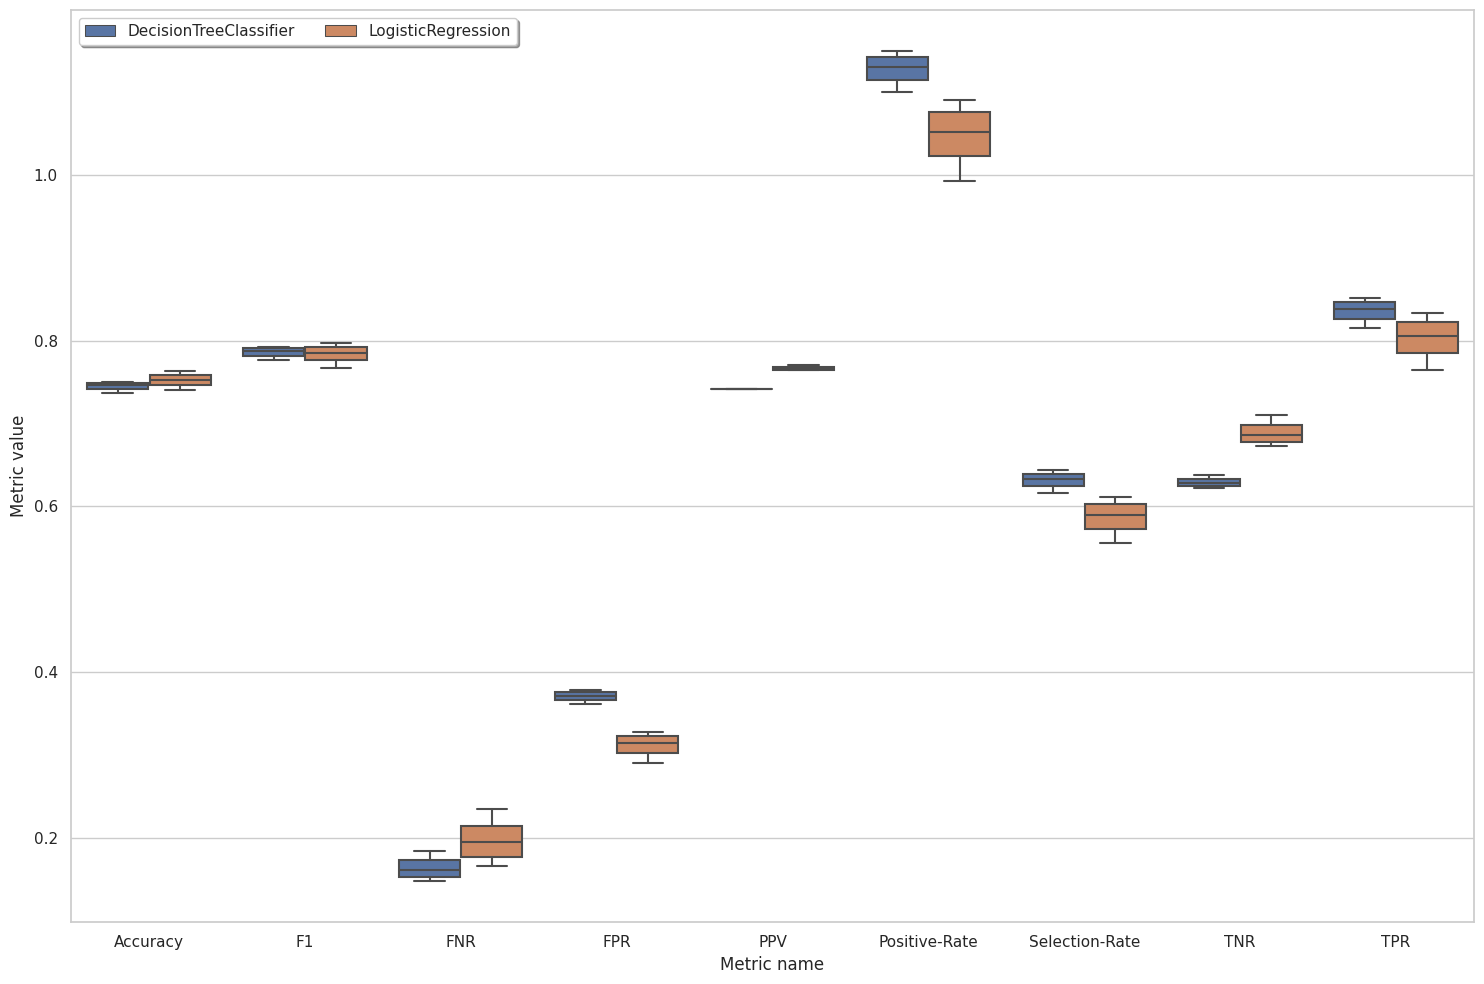

In [113]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')